In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Datetime Handling
import datetime

# File System Operations
import os

In [2]:
# File name only
file_name = "tmdb_5000_movies.csv"

# Load the dataset (file must be in the current working directory)
df = pd.read_csv(file_name)

# Perform EDA
print("\nInitial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15

In [4]:
# Extract genres from JSON strings
def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str)
        return ", ".join([genre['name'] for genre in genres_list])
    except json.JSONDecodeError:
        return ""  # Handle invalid JSON strings

df['genre'] = df['genres'].apply(extract_genres)

# Drop the original 'genres' column (optional)
df = df.drop('genres', axis=1)

df.head()

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


In [5]:
# List of columns to remove
columns_to_remove = ['budget', 'homepage', 'id', 'keywords', 'original_language','overview', 'popularity','production_countries','production_companies','release_date','revenue','runtime','spoken_languages','status','tagline','title','vote_count']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Verify the changes
print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4803 non-null   object 
 1   vote_average    4803 non-null   float64
 2   genre           4803 non-null   object 
dtypes: float64(1), object(2)
memory usage: 112.7+ KB
None

Preview of Updated DataFrame:


,original_title,vote_average,genre
0,Avatar,7.2,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,6.9,"Adventure, Fantasy, Action"
2,Spectre,6.3,"Action, Adventure, Crime"
3,The Dark Knight Rises,7.6,"Action, Crime, Drama, Thriller"
4,John Carter,6.1,"Action, Adventure, Science Fiction"


In [8]:
df = df.rename(columns={'original_title': 'Titles'})
df = df.rename(columns={'vote_average': 'Rating'})

print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Titles  4803 non-null   object 
 1   Rating  4803 non-null   float64
 2   genre   4803 non-null   object 
dtypes: float64(1), object(2)
memory usage: 112.7+ KB
None

Preview of Updated DataFrame:


,Titles,Rating,genre
0,Avatar,7.2,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,6.9,"Adventure, Fantasy, Action"
2,Spectre,6.3,"Action, Adventure, Crime"
3,The Dark Knight Rises,7.6,"Action, Crime, Drama, Thriller"
4,John Carter,6.1,"Action, Adventure, Science Fiction"


In [9]:
# 1. Check for null or missing values
print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

# 2. Check for duplicate rows
print("\nChecking for Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Display updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
Titles    0
Rating    0
genre     0
dtype: int64

Checking for Duplicate Rows:
Number of duplicate rows: 0

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Titles  4803 non-null   object 
 1   Rating  4803 non-null   float64
 2   genre   4803 non-null   object 
dtypes: float64(1), object(2)
memory usage: 150.1+ KB


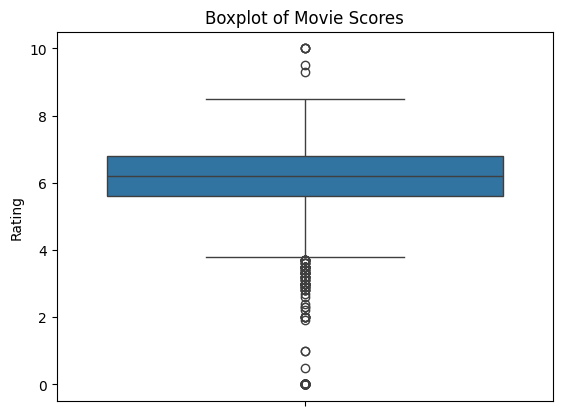

In [10]:
sns.boxplot(df['Rating'])
plt.title("Boxplot of Movie Scores")
plt.show()

In [11]:
# Save the cleaned DataFrame
df.to_csv('Cleaned_tmdb_5000_movies.csv', index=False)